![alt text](../../media/madeline-liu-4rFZ-d2EcHA-unsplash.jpg)

Photo by <a href="https://unsplash.com/@madeline_sd?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Madeline Liu</a> on <a href="https://unsplash.com/photos/a-row-of-books-sitting-on-top-of-a-wooden-shelf-4rFZ-d2EcHA?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>      

# Board Game Geek Data Analysis

## Overview
An initial exploration, analysis, and transformation of data relating to Board Games on <a href="https://boardgamegeek.com/">BoardGameGeek</a>. Data taken from <a href="https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek">Kaggle</a>.

## Contents
1. [Package Imports](#package-imports)
2. [Data Loading](#data-loading)
3. [Data Overview](#data-overview)
4. [Data Preparation and Export](#data-preparation-and-export)

## Package Imports <a id="package-imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

## Data Loading <a id="data-loading"></a>

In [2]:
# load environment variables from file
try:
    load_dotenv()

    DB_USER = os.getenv("DB_USER")
    DB_PASSWORD = os.getenv("DB_PASSWORD")
    DB_HOST = os.getenv("DB_HOST")
    DB_NAME = os.getenv("DB_NAME")

    print('Environment variables loaded')
except:
    print('Issue loading environment variables')

Environment variables loaded


In [4]:
# connect to DB
try:
    conn = mysql.connector.connect(
        host=DB_HOST,
        user=DB_USER,
        password=DB_PASSWORD,
        database=DB_NAME,
        use_pure=True
    )
except mysql.connector.Error as err:
    print(err)

In [5]:
# load data to data frames
games_df = pd.read_sql("SELECT * FROM games_reduced", conn)
designers_df = pd.read_csv("../../data/raw/designers_reduced.csv")
publishers_df = pd.read_csv("../../data/raw/publishers_reduced.csv")

C:\Users\ajbea_000\AppData\Local\Temp\ipykernel_3748\3999299450.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  games_df = pd.read_sql("SELECT * FROM games_reduced", conn)


## Data Overview <a id="data-overview"></a>

To Note:
- games_df is retrieved from a locally hosted MySQL database. This was not a necessary step, however I wanted to practice retrieving data in this manner. In order to originally import this table into the database significant data processing has already occurred. This includes operations such as: dropping columns, transforming date fields, transforming data types, filling NULL values, removing irrelevant rows.
- publishers_df and designers_df are accessed directly from csv as they contain far too many columns to import into the database without transormational work, probably in Python, before hand. I intend to transform both data frames into simplified and more useable forms before exporting back to csv, ready for use in Power BI.

In [6]:
games_df.head()

,BGGId,Name,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,1986,4.3206,7.61428,7.10363,1.57979,3,5,5,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
1,2,Dragonmaster,1981,1.9630,6.64537,5.78447,1.45440,3,4,0,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
2,3,Samurai,1998,2.4859,7.45601,7.23994,1.18227,2,4,3,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
3,4,Tal der Könige,1992,2.6667,6.60006,5.67954,1.23129,2,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,5,Acquire,1964,2.5031,7.33861,7.14189,1.33583,2,6,4,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'


In [13]:
games_df.describe()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,NumOwned,...,NumImplementations,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames
count,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,...,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000
mean,118600.844745,2007.012861,1.986104,6.432338,5.687829,1.514094,2.006199,5.692080,0.311806,1474.746993,...,0.311205,10970.120929,19703.218079,20904.552091,19729.558383,20719.177461,21620.785252,18640.071937,21302.218264,21077.751203
std,104728.342051,13.682522,0.848717,0.925198,0.364887,0.284005,0.691416,15.043065,1.067216,5314.686501,...,0.852410,6362.690731,6423.639399,4560.173752,6390.844597,4926.702423,2559.882866,7458.117763,3618.206184,4185.374585
min,1.000000,1900.000000,0.000000,1.041330,3.799290,0.196023,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12499.750000,2002.000000,1.333300,5.846407,5.510660,1.319295,2.000000,4.000000,0.000000,152.000000,...,0.000000,5446.750000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000
50%,109373.500000,2012.000000,2.000000,6.460270,5.547310,1.474390,2.000000,4.000000,0.000000,324.000000,...,0.000000,10949.500000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000
75%,207076.500000,2017.000000,2.533300,7.056775,5.682070,1.662450,2.000000,6.000000,0.000000,905.250000,...,0.000000,16479.250000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000
max,349131.000000,2021.000000,5.000000,9.595240,8.514880,4.277280,10.000000,999.000000,15.000000,166497.000000,...,38.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000,21926.000000


* We have 21,616 games in our dataset. 
* The earliest game was released in 1900 and latest in 2021.
* The average board game rating is 6.43.

In [ ]:
# Earliest boardgame(s) listed by year published
games_df[games_df['YearPublished'] == games_df['YearPublished'].min()]

,BGGId,Name,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
5790,14765,Tuppi,1900,2.6,7.22162,5.53631,1.68140,4,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
6083,17183,1001,1900,2.0,6.61212,5.51811,1.58282,2,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
6165,17755,Schnipp Schnapp,1900,1.0,4.81750,5.47915,1.74898,2,6,0,...,21926,674,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1'


The earliest games in our data set are from 1900. In the original data set there were some older listed games, however they had some bad data and aren't really relevant for the analysis I wish to perform.

In [9]:
# Latest boardgame(s) listed by year published
games_df[games_df['YearPublished'] == games_df['YearPublished'].max()]

,BGGId,Name,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
8158,35220,Help Arrives!,2021,4.0000,7.97500,5.55797,1.57562,2,2,0,...,21926,21926,b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'
9248,57937,The Doomsday Project: Episode 1 – The Battle f...,2021,3.6000,8.20968,5.53855,1.49069,1,2,0,...,21926,21926,b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'
13079,156443,AVGhost: Paranormal Investigation,2021,2.5000,7.09237,5.55091,2.73987,1,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
14180,173514,Meeple Quest,2021,1.5000,9.31111,5.52464,1.48806,1,5,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
14897,183780,Heart of Darkness: An Adventure Game of Africa...,2021,3.0000,6.95909,5.53141,2.14289,1,5,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,346703,7 Wonders: Architects,2021,1.4286,7.22351,6.08654,1.44546,2,7,0,...,21926,21926,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0'
21611,346965,Azul: Queen's Garden,2021,3.0714,7.67076,5.73362,1.33254,2,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
21612,347146,Salvage,2021,0.0000,7.45000,5.52462,1.55493,3,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
21614,348955,Rock Paper Scissors: Deluxe Edition,2021,4.5625,6.96970,5.53964,4.05257,1,3,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


The latest games in our data set are from 2021. This is a few years outdated from the time of this analysis, but a more up to date data set was not available. Perhaps, in a future extension to this project, I can source my own data from BoardGameGeek through their APIs or from scraping.
There are significantly more games in this year than in the minimum year, unsurprising, but likely to be the case as time has gone on and the hobby and it's audience has become bigger.

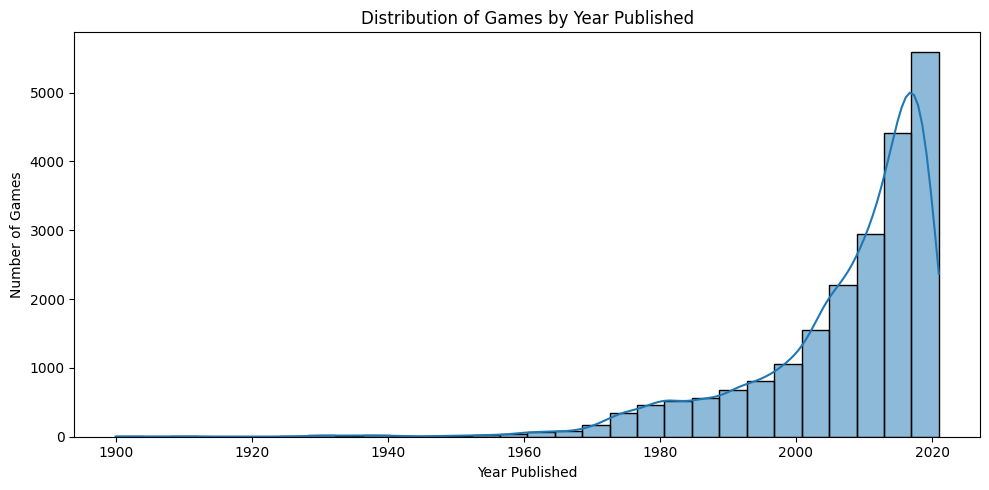

In [10]:
# Count of games released by year (buckets)

plt.figure(figsize=(10, 5))
sns.histplot(games_df['YearPublished'].dropna(), bins=30, kde=True)
plt.xlabel("Year Published")
plt.ylabel("Number of Games")
plt.title("Distribution of Games by Year Published")
plt.tight_layout()
plt.show()

This rough plot shows that, over time, more and more board games are being released each year, with the majority of games being released in the last 15 years.

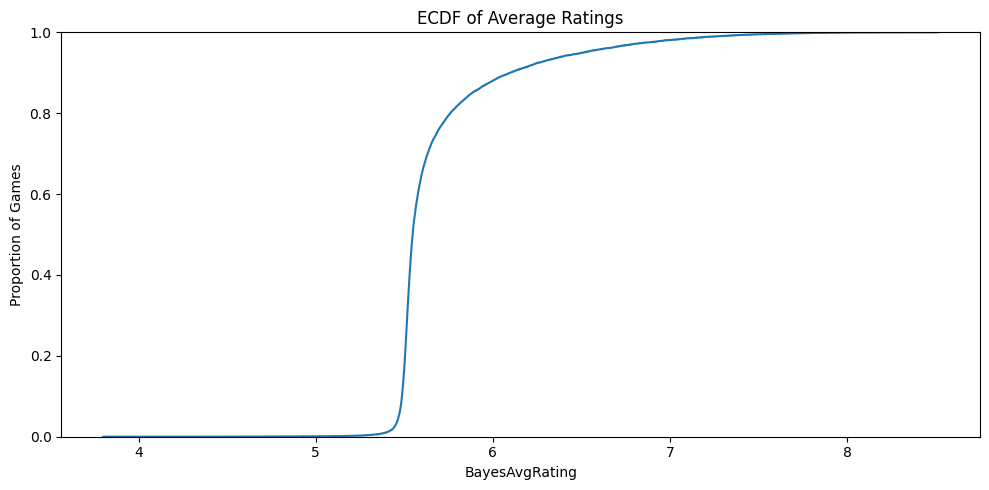

In [17]:
plt.figure(figsize=(10, 5))
sns.ecdfplot(games_df['BayesAvgRating'])
plt.title("ECDF of Average Ratings")
plt.xlabel("BayesAvgRating")
plt.ylabel("Proportion of Games")
plt.tight_layout()
plt.show()

This ECDF plot suggests that, when using BayesAvgRating instead of just AvgRating, we get a more sensible distribution of ratings that spans between 5.5 and 6.5 roughly.
To confirm this, I will consider the top 10 highest rated games by each method of rating.

In [18]:
# Top 10 rated games (AvgRating)
games_df.sort_values(by='AvgRating', ascending=False).head(10)

,BGGId,Name,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
19702,275777,Erune,2021,0.0000,9.59524,5.51947,1.235570,2,5,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
21607,345976,System Gateway (fan expansion for Android: Net...,2021,0.0000,9.48333,5.57641,1.017210,2,2,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
17210,228370,TerroriXico,2018,2.5000,9.42857,5.50463,1.695130,2,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
18818,256885,The Fantasy Trip: Legacy Edition,2019,2.8333,9.32946,5.73728,0.979854,2,10,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
14180,173514,Meeple Quest,2021,1.5000,9.31111,5.52464,1.488060,1,5,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
10018,85147,Wings of the Motherland,2019,4.2500,9.29208,5.61394,1.299790,2,8,0,...,21926,21926,b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'
19911,281257,Aeolis,2020,2.0000,9.25000,5.52250,1.785360,1,7,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
12747,151070,Gladiatoris,2009,2.8000,9.22742,5.51917,1.150020,1,6,0,...,21926,21926,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0'
20361,290500,Flip & Fish,2019,1.0000,9.13667,5.51644,1.036820,2,4,0,...,21926,21926,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
12579,148213,Primer: The Gamer's Source for Battles from th...,2013,4.0000,9.13610,5.60558,0.904453,2,6,0,...,21926,21926,b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'


I have personally only heard of one of the above listed games.

In [ ]:
# Top 10 rated games (BayesAvgRating)
games_df.sort_values(by='BayesAvgRating', ascending=False).head(10)

,BGGId,Name,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,BestPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
14227,174430,Gloomhaven,2017,3.8699,8.74997,8.51488,1.63975,1,4,3,...,21926,21926,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
13424,161936,Pandemic Legacy: Season 1,2015,2.8336,8.59678,8.44451,1.56179,2,4,4,...,21926,21926,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
17033,224517,Brass: Birmingham,2018,3.9058,8.66562,8.41573,1.24126,2,4,3,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
13780,167791,Terraforming Mars,2016,3.2441,8.41879,8.27421,1.38764,1,5,3,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
17537,233078,Twilight Imperium: Fourth Edition,2017,4.2497,8.67916,8.25955,1.60640,3,6,6,...,21926,21926,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
20383,291457,Gloomhaven: Jaws of the Lion,2020,3.5779,8.69610,8.25163,1.42380,1,4,2,...,21926,21926,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
16832,220308,Gaia Project,2017,4.3617,8.47909,8.17758,1.38614,1,4,3,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
15076,187645,Star Wars: Rebellion,2016,3.7229,8.42432,8.17121,1.36603,2,4,2,...,21926,21926,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
14762,182028,Through the Ages: A New Story of Civilization,2015,4.4142,8.38861,8.15369,1.50805,2,4,3,...,21926,21926,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
10963,115746,War of the Ring: Second Edition,2012,4.1740,8.50988,8.13104,1.48272,2,4,2,...,21926,21926,b'1',b'0',b'1',b'0',b'0',b'0',b'0',b'0'


This is much better. I know of all but one of these games, and I have played a good number of them.

In [ ]:
designers_df.head()

In [ ]:
publishers_df.head()

In [ ]:
conn.close()

## Data Preparation and Export <a id="data-preparation-and-export"></a>